 # Titanic: Survival of the Richest

---

The following data set was again collected from Kaggle and it's data on all the passengers that were onboard the famous Titanic the day it crashed onto the infamous iceberg. The data set contains both categorical and numerical data which I'll explain in a moment.

I'll be using this data set to create a Logistic Regression to predict which passengers were the most likely to survive the crash.


## The Data set

### Categorical Variables

#### 1) Passenger Names 
#### 2) Sex/Gender = Male or Female
#### 3) Ticket = Ticket nubers
#### 4) Cabin = Room Numbers
#### 5) Embarked = Port the passengers boarded from

### Numerical Variables

#### 1) Survived ( Survived= 1, died = 0)
#### 2) Pclass = Passenger ticket class first second or thind
#### 3) SibSp = Siblings or spouse on boadr
#### 4) Parent & Child
#### 5) Fare

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=8,4

Now that my imports are all done and dusted, I'll import the dataset and begin my analysis.

In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the preview, I can already see that the data set has a few missing values, but  before I deal with them, I need to get the full picture concerning whats missing and and then I can decide on the best action to take from there.

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


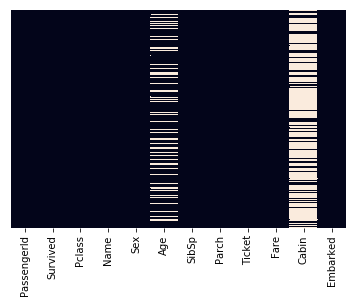

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

From the heatmp turned DNA fingerprint, I can see the missing values a lot clearer. The Age column has quite a few missing values and I can deal with them in a number of ways. The Cabin cloumn has the highest number of missing values, and I'm not too sure how or where I can find these missing values, and for that reason I've decided to drop this column entirely.

In [8]:
df = df.drop('Cabin',axis=1)

In [9]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


Now I'm ready to tackle the Age column. I could fill the missing values with the mean value for age as a whole, but that would be unfair on my model because as you can see from the Boxplots below, the ages seem to vary depending on the class of the passenger. 

It looks like the wealthy passengers in first class had a mean age of about 37 for the males and just slightly lower at about 36 for the females, with one or two of them bring their children on board. The people in the second class have very similar mean ages for both sexes, but the males in this category have a lot of outliers, looking at this classes plotted on a violin plot, it shows a slight concentration of values around the ages of 7-10 & 56-60, I think I'm correct in assuming these are the people that brought their children on board, and some of them may have brought the whole family including grandparents. The upper outliers could be old middle-class couples going for a cruse.

Now for the people that had it the worst. The passengers in third class were a broad mixture of people from all age groups but a majority of these people were young males and females in their mid-20s, with quite a few of them being women. 

For these reasons, I'll impute the missing values by class mean.

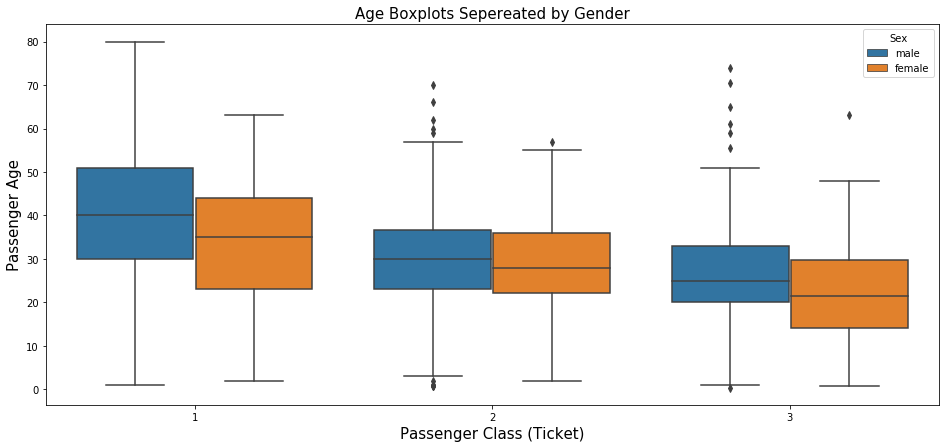

In [14]:
plt.figure(figsize=(16,7))
sns.boxplot(data=df,x='Pclass',y='Age',hue='Sex')
plt.title('Age Boxplots Sepereated by Gender',fontsize=15)
plt.xlabel('Passenger Class (Ticket)',fontsize=15)
plt.ylabel('Passenger Age',fontsize=15)
plt.show()

Violin plot

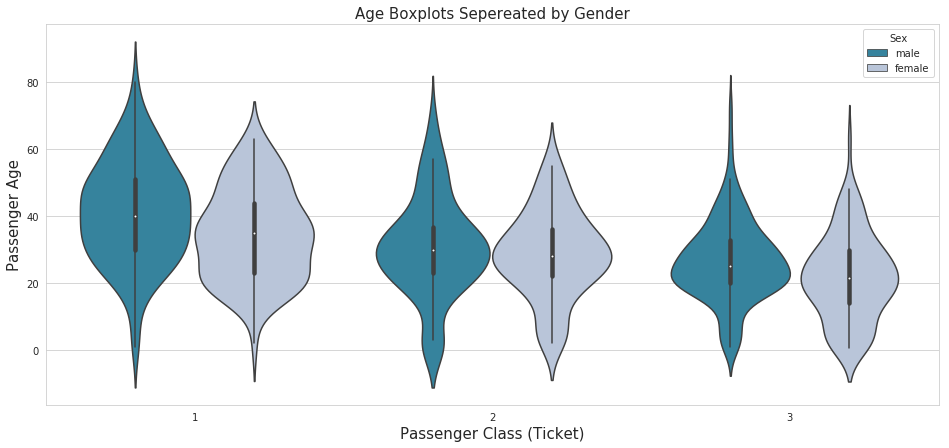

In [16]:
plt.figure(figsize=(16,7))
sns.set_style('whitegrid')
sns.violinplot(data=df,x='Pclass',y='Age',hue="Sex",palette="PuBuGn_r")
plt.title('Age Boxplots Sepereated by Gender',fontsize=15)
plt.xlabel('Passenger Class (Ticket)',fontsize=15)
plt.ylabel('Passenger Age',fontsize=15)
plt.show()

Now to add all the missing Age values. The follwing fuction will perform the imputation accordingly

In [17]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
df['Age'] = df[["Age","Pclass"]].apply(impute_age,axis=1)

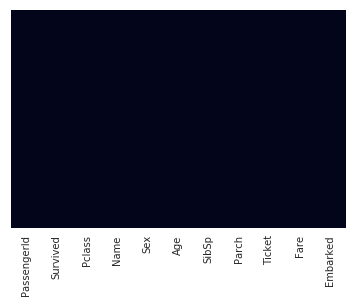

In [19]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


My dataset has no more missing values. Now I can do some further analysis

----

# Exploratory data analysis

---

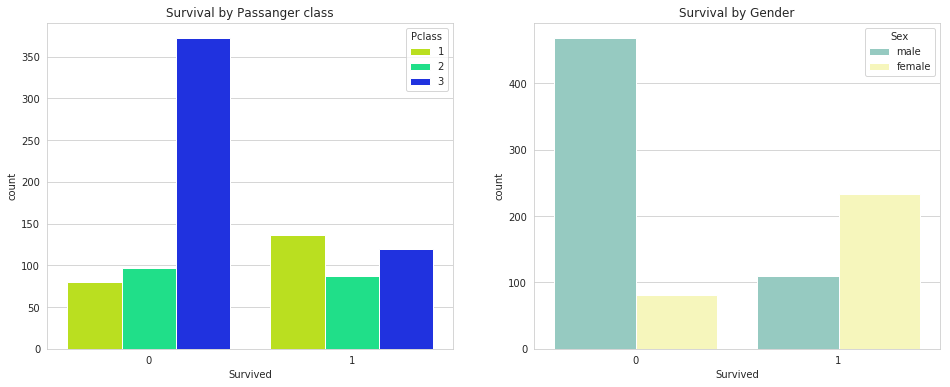

In [23]:
sns.set_style('whitegrid')
fig,a =  plt.subplots(1,2,figsize=(16,6))
p1 = sns.countplot(data=df, x='Survived',hue='Pclass',ax=a[0],palette="gist_rainbow")
p2 = sns.countplot(data=df, x='Survived',hue='Sex',ax=a[1], palette= "Set3")
a[0].set_title("Survival by Passanger class")
a[1].set_title("Survival by Gender")
plt.show()


The above count plots tell a very grim story for the passengers in third class, only a third of them survived the trip, and a majority of those survivors were women, meaning most of the passengers that died were young lower & middle-class men.

In [24]:
df.Pclass = df.Pclass.astype('category')
df.Sex = df.Sex.astype('category')

In [25]:
men=df[df.Sex=='male']
men.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


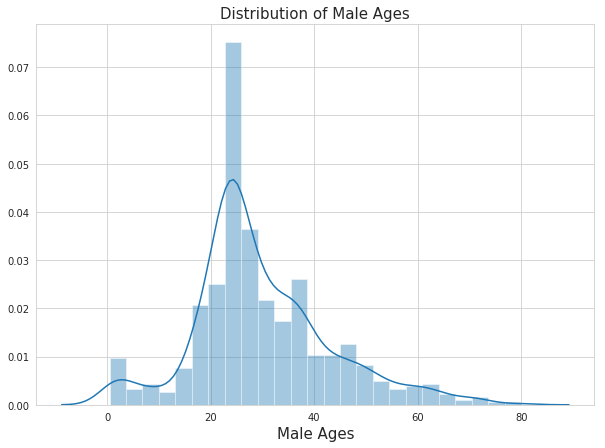

In [41]:
plt.figure(figsize=(10,7))
sns.distplot(men.Age,bins=25)
plt.title('Distribution of Male Ages',fontsize=15)
plt.xlabel('Male Ages',fontsize=15)
plt.show()

From the above distribution plot we can easily see that most of the male paasengers were between the ages of 20 and 35 due to the distribution being right skewed and we already know that most of the bought third class tickets, so this is definately the group that suffered the most loss.

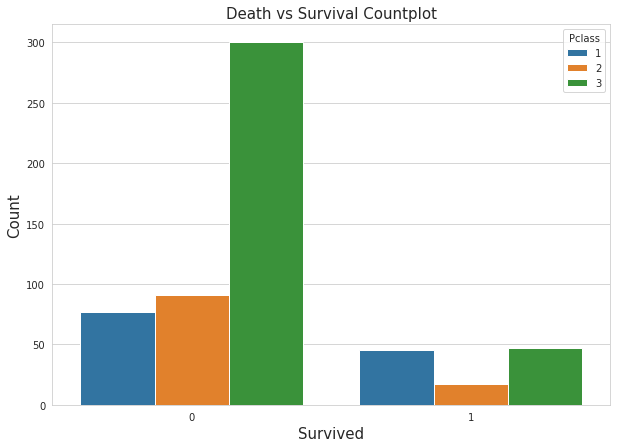

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(data=men,x="Survived",hue="Pclass")
plt.title('Death vs Survival Countplot',fontsize=15)
plt.xlabel('Survived',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [34]:
wmen =df[df.Sex=='female']
wmen.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


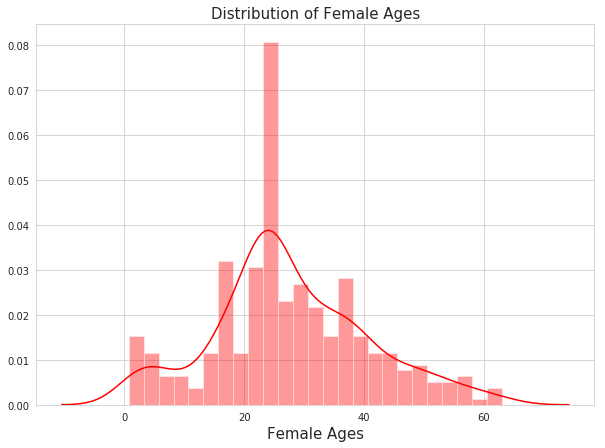

In [45]:
plt.figure(figsize=(10,7))
sns.distplot(wmen.Age,bins=25,color='red')
plt.title('Distribution of Female Ages',fontsize=15)
plt.xlabel('Female Ages',fontsize=15)
plt.show()

We see the same trend as we did for the men, most of the females onboard the titanic were very young women, and almost half of the total number women that had third class tickets died. My personal opinion is that these were the young couples, and perhaps some had their children there too.

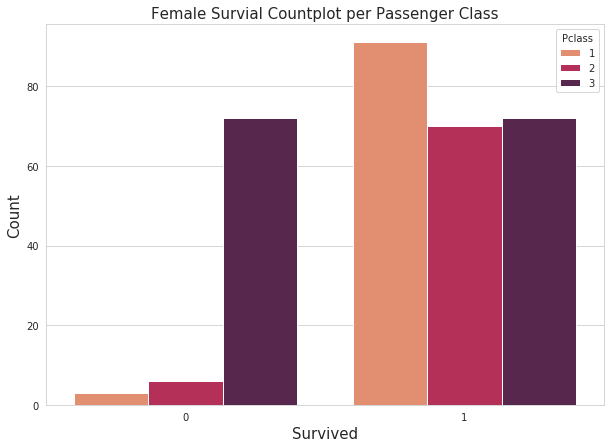

In [53]:
plt.figure(figsize=(10,7))
sns.countplot(data=wmen,x="Survived",hue="Pclass",palette="rocket_r")
plt.title('Female Survial Countplot per Passenger Class',fontsize=15)
plt.xlabel('Survived',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

As we can see from the above bar graphs, only a handful of first-class and second-class ladies lost their lives, whereas half of the total number of the women and girls in the third class lost their lives.

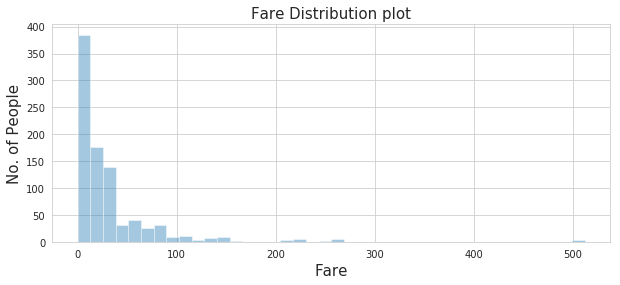

In [54]:
plt.figure(figsize=(10,4))
sns.distplot(df.Fare, kde=False,bins=40,)
plt.xlabel('Fare',fontsize=15)
plt.ylabel('No. of People',fontsize=15)
plt.title('Fare Distribution plot',fontsize=15)
plt.show()

The distribution plot of the fares paid show that the majority of people bought the cheap tickets, and unfortunately, most of these people died.

---

# Now to Trepare the Data for Logistig Regression

## Time for some Data Wrangling

we saw fom above that there were some missing values in the Age column, the cabin coulumn and just two value in the embarked column.

In [55]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [56]:
df = df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now I need to deal with categorical features and convert them into dummy variables using pandas, and in this particular data set we have 3: Sex, Embarked and Pclass columns. Remembering not to fall for the dummy trap, I'll drop one of the dummy variables from each feature.

In [57]:
sex = pd.get_dummies(df.Sex, drop_first=True)

In [58]:
embark = pd.get_dummies(df.Embarked,drop_first=True)

In [59]:
cls = pd.get_dummies(df.Pclass,drop_first=True)

In [60]:
final_df = pd.concat([df,sex,embark,cls],axis=1)

In [61]:
final_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [62]:
final_df.drop(['Sex','Name','Ticket','Embarked','PassengerId'],axis=1,inplace=True)
final_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


Now this Data is perfect for the Logistic regression model

---

# Now for the Logistic Regression

---

In [63]:
X = final_df.drop('Survived',axis=1)

In [64]:
y= final_df.Survived

In [65]:
from sklearn.model_selection import train_test_split 

In [66]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()

In [69]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
predictions = logmodel.predict(X_test)

In [71]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [72]:
from sklearn.metrics import classification_report # the classification report will basically tell you 

In [73]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 33,  71]])

The model has performed the logistic regression and in my opinion, it's done well with an accuracy of 82%. We can see from the confusion matrix that the number of False Negatives or Type 2 errors was only 33, and False positives or Type 1 errors landed at 14.

---

# Thank you for taking the time to view my logistic regression, i look forward to hearing your comments and suggestions

---